<a href="https://colab.research.google.com/github/sowmyarshetty/NNClass/blob/main/preprocessing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from PIL import Image

In [16]:
# Import images from a pickle file
# This pickle file is hosted at a url, so some
# additional code is needed
import pickle
import requests
import io

path = 'https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/pickles/face_images.pkl'

imgs = pickle.load(io.BytesIO(requests.get(path).content))

imgs[1]

In [17]:
# Check the size of the second image
imgs[1].size


(32, 30)

In [18]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in imgs]) # set means no duplicate values
sizes

{(32, 30), (64, 60), (128, 120)}

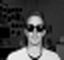

In [19]:
# Convert the images to the middle 64, 60 size
# Lets try with the first image
target_size = (64,60)
imgs[1].resize(target_size,resample = Image.LANCZOS)

#data augmentation



In [20]:
len(imgs)

624

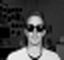

In [21]:
# Using the same syntax, use a for loop to apply resizing to all images
resized_images = [img.resize(target_size,resample = Image.LANCZOS) for img in imgs]
resized_images[1]


In [22]:
# Lets examine our data numerically.
# This is most easily done by converting the image to a numpy array
pixel_values = np.array(resized_images[0])

# Convert one image to a NumPy array
print("Pixel values:")

# Display the pixel values
print(pixel_values)


Pixel values:
[[21 19 19 ... 45 45 43]
 [47 43 33 ... 45 45 45]
 [64 66 75 ... 45 45 43]
 ...
 [50 43 40 ...  0  0  0]
 [49 43 33 ...  0  0  0]
 [49 47 33 ... 29  0  0]]


Note the shape of the data: an array of arrays, where each internal array represents one row of pixels. The numbers indicate how bright each pixel is on a scale of 0 to 255 where 255 is full brightness and zero is black. These numbers are what our model will use to make predictions! Many image models expect floating point values, so its common practice to convert from integers to floating point before other preprocessing steps. Note that from this point forward, we will not be able to visualize the images without using some sort of plotting library; we've converted the images to numbers!

In [23]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]

# Display the pixel values of the first image
print("pixel values")
print(float_images[0])

# flops - how fast the chips operate . floating points operations per second




pixel values
[[21. 19. 19. ... 45. 45. 43.]
 [47. 43. 33. ... 45. 45. 45.]
 [64. 66. 75. ... 45. 45. 43.]
 ...
 [50. 43. 40. ...  0.  0.  0.]
 [49. 43. 33. ...  0.  0.  0.]
 [49. 47. 33. ... 29.  0.  0.]]


In [24]:
# To normalize pixel values to a range between 0 and 1,
# we need to divide all pixel values by the max of 255
#Standardscaler
# converts a number ot its Z-score 99.99% of the time is between -3 and 3
# 0 mean and 1 standard devation
#MinMaxScaler


# this will be another 3 dimensional array
#we are putting the entire dataset into a 3 dimensional


normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
np.array(normalized_images).shape

(624, 60, 64)

In [25]:
# Import the modules
from google.colab import drive
import pickle

drive.mount('/content/drive/')

# Open a new file named 'img_preprocessed.pkl' with write permission
with open('/content/drive/MyDrive/img_preprocessed.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(imgs, file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
# Save our preprocessed images to a new pickle file

with open('/content/drive/My Drive/img_preprocessed.pkl', 'wb') as file:
    pickle.dump(normalized_images, file)

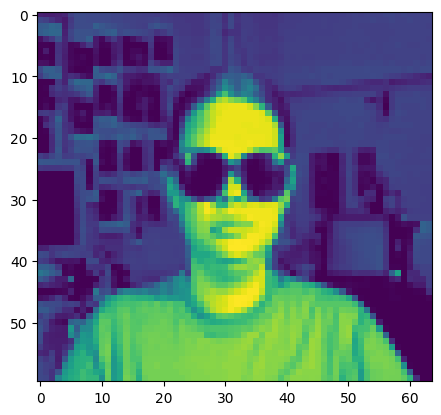

In [27]:
import matplotlib.pyplot as plt
plt.imshow(normalized_images[0])